In [1]:
import db_logger
import matplotlib.pyplot as plt
import glob, pathlib
import ipywidgets as widgets
import numpy as np
%load_ext autoreload
%autoreload 2

%matplotlib widget

In [38]:

logger =  db_logger.DB_Logger("/mnt/data/arty/data/gan_sampling/baseline.db", connect_only=True)
name2id = {}
for id in logger.get_experiment_ids():
    name = logger.get_experiment_name(id)
    name2id[name] = id
    print(name) 
    # if "OrganCMNIST" in name and "aug_True" in name:
    #     logger.remove_experiment(id)

Connecting to existing database at /mnt/data/arty/data/gan_sampling/baseline.db
BloodMNIST_rlvl1_blvl0_alvl0
BloodMNIST_rlvl1_blvl1_alvl0
OrganCMNIST_rlvl1_blvl0_alvl0
OrganCMNIST_rlvl1_blvl1_alvl0
PathMNIST_rlvl1_blvl0_alvl0
PathMNIST_rlvl1_blvl1_alvl0
BloodMNIST_rlvl2_blvl0_alvl0
BloodMNIST_rlvl2_blvl1_alvl0
PathMNIST_rlvl2_blvl0_alvl0
OrganCMNIST_rlvl2_blvl0_alvl0
PathMNIST_rlvl2_blvl1_alvl0
OrganCMNIST_rlvl2_blvl1_alvl0
BloodMNIST_rlvl3_blvl0_alvl0
BloodMNIST_rlvl3_blvl1_alvl0
PathMNIST_rlvl3_blvl0_alvl0
OrganCMNIST_rlvl3_blvl0_alvl0
PathMNIST_rlvl3_blvl1_alvl0
OrganCMNIST_rlvl3_blvl1_alvl0
BloodMNIST_rlvl0_blvl0_alvl0
BloodMNIST_rlvl0_blvl1_alvl0
PathMNIST_rlvl0_blvl0_alvl0
PathMNIST_rlvl0_blvl1_alvl0
OrganCMNIST_rlvl0_blvl0_alvl0
BloodMNIST_rlvl1_blvl0_alvl1
BloodMNIST_rlvl1_blvl1_alvl1
PathMNIST_rlvl1_blvl0_alvl1
OrganCMNIST_rlvl0_blvl1_alvl0
OrganCMNIST_rlvl1_blvl0_alvl1
OrganCMNIST_rlvl1_blvl1_alvl1
PathMNIST_rlvl1_blvl1_alvl1
BloodMNIST_rlvl2_blvl0_alvl1
BloodMNIST_rlvl2_blvl

In [56]:
results = {}
from collections import defaultdict
# Your data (accuracy, std, rlvl, b, aug)
data = defaultdict(list)
for exp in logger.get_experiment_ids():
    samples = logger.get_global_stats(exp)
    if len(samples) == 0:
        continue
    name = logger.get_experiment_name(exp)
    # print(name, mean, std, max, min, samples)
    results[f"{name:<30}, samples: {len(samples):<3}"] = (samples.mean().item(), samples.std().item(), samples.max().item(), samples.min().item(), len(samples))
    name, rlvl, blvl, alvl = name.split("_")
    rlvl = int(rlvl[-1])
    alvl = int(alvl[-1])
    blvl = int(blvl[-1])

    data[name].append((samples, rlvl, blvl, alvl))
    


(10048, 10048)
kick
(10048, 10048)
kick
(10048, 10048)
kick
(10048, 20032, 30016, 40000, 50048, 60032, 70016, 80000, 90048, 100032, 100032)
(10048, 20032, 30016, 40000, 50048, 60032, 70016, 80000, 90048, 100032, 110016, 132864, 155648, 178496, 201344, 224128, 246976, 269760, 292608, 315392, 338240, 361088, 383872, 406720, 429504, 452352, 475136, 497984, 520832, 543616, 566464, 589248, 612096, 634880, 657728, 680512, 703360, 726208, 748992, 771840, 794624, 817472, 840256, 863104, 885952, 908736, 931584, 954368, 977216, 1000000, 1100032, 1328256, 1556416, 1784640, 2012864, 2241088, 2469248, 2697472, 2925696, 3153856, 3382080, 3610304)
(10048, 20032, 30016, 40000, 50048, 60032, 70016, 80000, 90048, 100032, 110016, 132864, 155648, 178496, 201344, 224128, 246976, 269760, 292608, 315392, 338240, 361088, 383872, 406720, 429504, 452352, 475136, 497984, 520832, 543616, 566464, 589248, 612096, 634880, 657728, 680512, 703360, 726208, 748992, 771840, 794624, 817472, 840256, 863104, 885952, 908736,

In [48]:
sorted_results = sorted(results.items(), key=lambda x: x[1][0], reverse=True)
filterfunc = lambda x: "O" in x[0] 
sorted_results = list(filter(filterfunc, sorted_results))
for k, (mean, std, max, min, samples) in sorted_results[:40]:
    print(f"{mean:.2f}+-{std:.2f} -> {k} max:{max:.2f}")

0.85+-0.03 -> OrganCMNIST_rlvl0_blvl1_alvl0 , samples: 7   max:0.89
0.85+-0.05 -> OrganCMNIST_rlvl1_blvl0_alvl0 , samples: 10  max:0.88
0.84+-0.06 -> OrganCMNIST_rlvl0_blvl0_alvl0 , samples: 7   max:0.89
0.83+-0.04 -> OrganCMNIST_rlvl1_blvl1_alvl0 , samples: 10  max:0.87
0.79+-0.03 -> OrganCMNIST_rlvl1_blvl1_alvl3 , samples: 3   max:0.83
0.79+-0.04 -> OrganCMNIST_rlvl1_blvl1_alvl2 , samples: 4   max:0.85
0.78+-0.03 -> OrganCMNIST_rlvl0_blvl1_alvl3 , samples: 3   max:0.81
0.78+-0.03 -> OrganCMNIST_rlvl1_blvl0_alvl2 , samples: 4   max:0.82
0.77+-0.01 -> OrganCMNIST_rlvl3_blvl1_alvl2 , samples: 4   max:0.80
0.77+-0.02 -> OrganCMNIST_rlvl0_blvl1_alvl2 , samples: 3   max:0.81
0.76+-0.04 -> OrganCMNIST_rlvl0_blvl0_alvl2 , samples: 3   max:0.79
0.75+-0.02 -> OrganCMNIST_rlvl0_blvl0_alvl3 , samples: 3   max:0.77
0.74+-0.04 -> OrganCMNIST_rlvl2_blvl0_alvl0 , samples: 9   max:0.79
0.74+-0.03 -> OrganCMNIST_rlvl2_blvl0_alvl3 , samples: 3   max:0.77
0.73+-0.03 -> OrganCMNIST_rlvl3_blvl1_alvl0 , sa

interactive(children=(Dropdown(description='exp1', options=('BloodMNIST_rlvl0_blvl0_alvl0', 'BloodMNIST_rlvl0_…

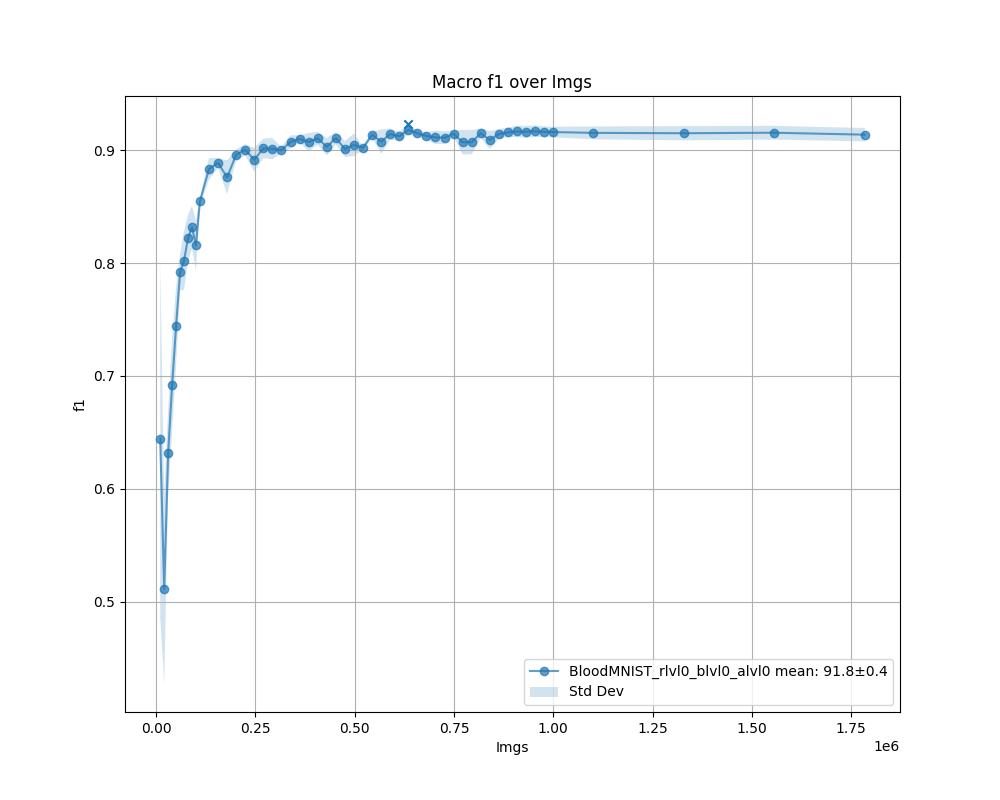

In [49]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
names = sorted([logger.get_experiment_name(x) for x in logger.get_experiment_ids()],)
@widgets.interact(
        exp1=names, 
        exp2=["none"]+names, 
        exp3=["none"]+names,
        exp4=["none"]+names,
        exp5=["none"]+names,
        metric=["f1", "acc", "precision", "recall"])
def display_content(exp1, exp2, exp3, exp4, exp5, metric):
    name2id = {}
    for id in logger.get_experiment_ids():
        name2id[logger.get_experiment_name(id)] = id
    print(f"Working ...", end="")
    ax.clear()
    db_logger.plot_metric(logger, [name2id[exp1]], metric=metric, ax=ax, prefix='')
    if exp2 != "none":
        db_logger.plot_metric(logger, [name2id[exp2]], metric=metric, ax=ax, prefix='')
    if exp3 != "none":
        db_logger.plot_metric(logger, [name2id[exp3]], metric=metric, ax=ax, prefix='')
    if exp4 != "none":
        db_logger.plot_metric(logger, [name2id[exp4]], metric=metric, ax=ax, prefix='')
    if exp5 != "none":
        db_logger.plot_metric(logger, [name2id[exp5]], metric=metric, ax=ax, prefix='')
    print(f"\rDone       ")

TypeError: unsupported operand type(s) for +: 'int' and 'NoneType'

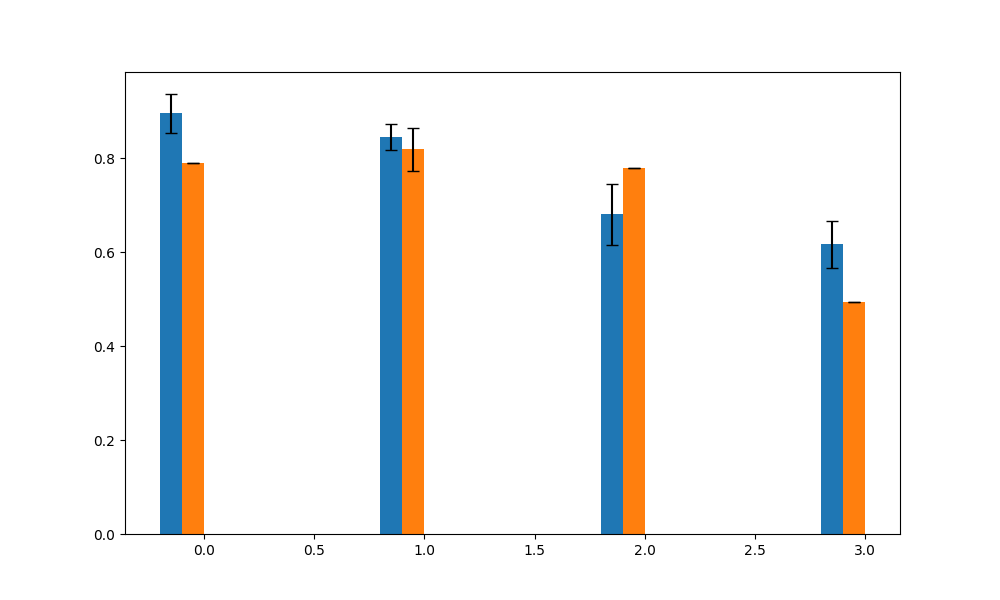

In [54]:
config_labels = {
    (0, 0): "blvl(0), alvl(0)",
    (0, 1): "blvl(0), alvl(1)",
    (0, 2): "blvl(0), alvl(2)",
    (0, 3): "blvl(0), alvl(3)",
    (1, 0): "blvl(1), alvl(0)",
    (1, 1): "blvl(1), alvl(1)",
    (1, 2): "blvl(1), alvl(2)",
    (1, 3): "blvl(1), alvl(3)",
}

# Organize data
means_by_group = {rlvl: {cfg: None for cfg in config_labels} for rlvl in range(4)}
stds_by_group = {rlvl: {cfg: 0.0 for cfg in config_labels} for rlvl in range(4)}
# Mapping config combinations to label
for name, d in data.items():

    for v, rlvl, blvl, alvl in d:
        key = (blvl, alvl)
        means_by_group[rlvl][key] = v.mean()
        stds_by_group[rlvl][key] = v.std()

    # Bar plot setup
    x = np.arange(4)  # rlvl 0,1,2,3
    width = 0.1

    fig, ax = plt.subplots(figsize=(10, 6))

    for i, config in enumerate(config_labels):
        means = [means_by_group[rlvl][config] for rlvl in x]
        stds = [stds_by_group[rlvl][config] for rlvl in x]
        offsets = x + (i - 1.5) * width
        ax.bar(offsets, means, width, yerr=stds, capsize=4, label=config_labels[config])

    # Aesthetics
    ax.set_ylabel('Macro F1')
    ax.set_xlabel('Representation Level (rlvl)')
    ax.set_title(f'{name} F1')
    ax.set_xticks(x)
    ax.set_xticklabels([f'rlvl {i}' for i in x])
    ax.set_ylim(0, 1.0)
    ax.legend(title="Config")
    ax.grid(axis='y', linestyle='--', alpha=0.5)

    plt.tight_layout()
    plt.savefig(f"{name}_bar.png")

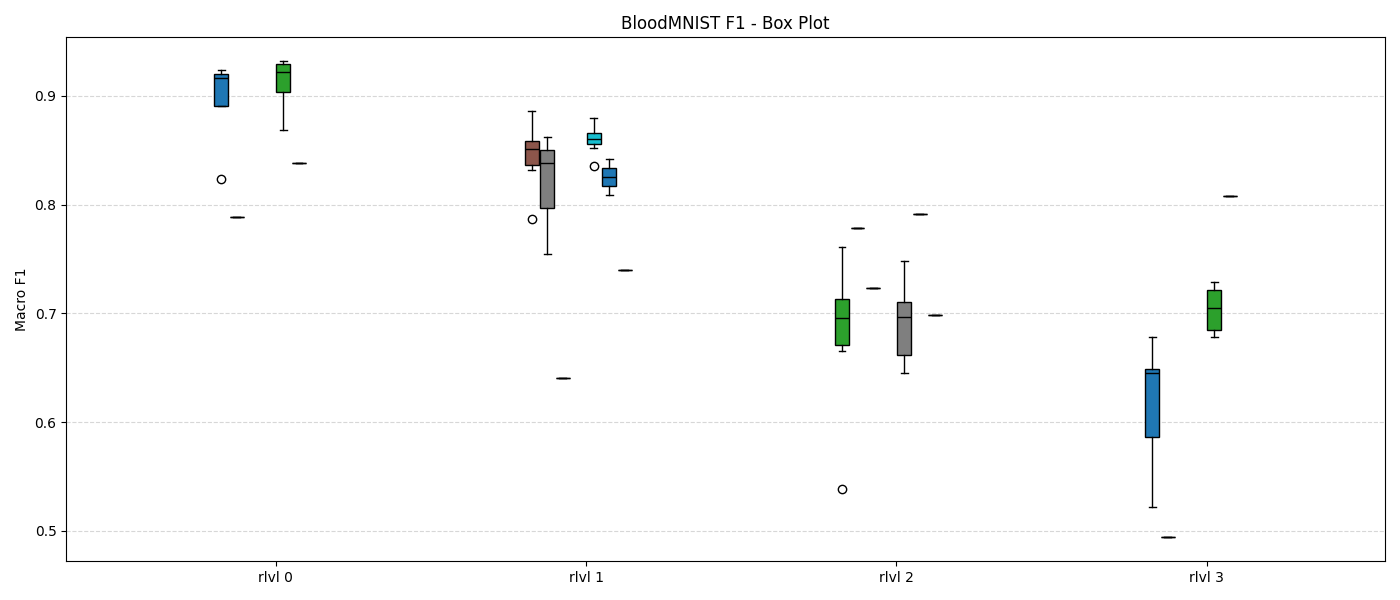

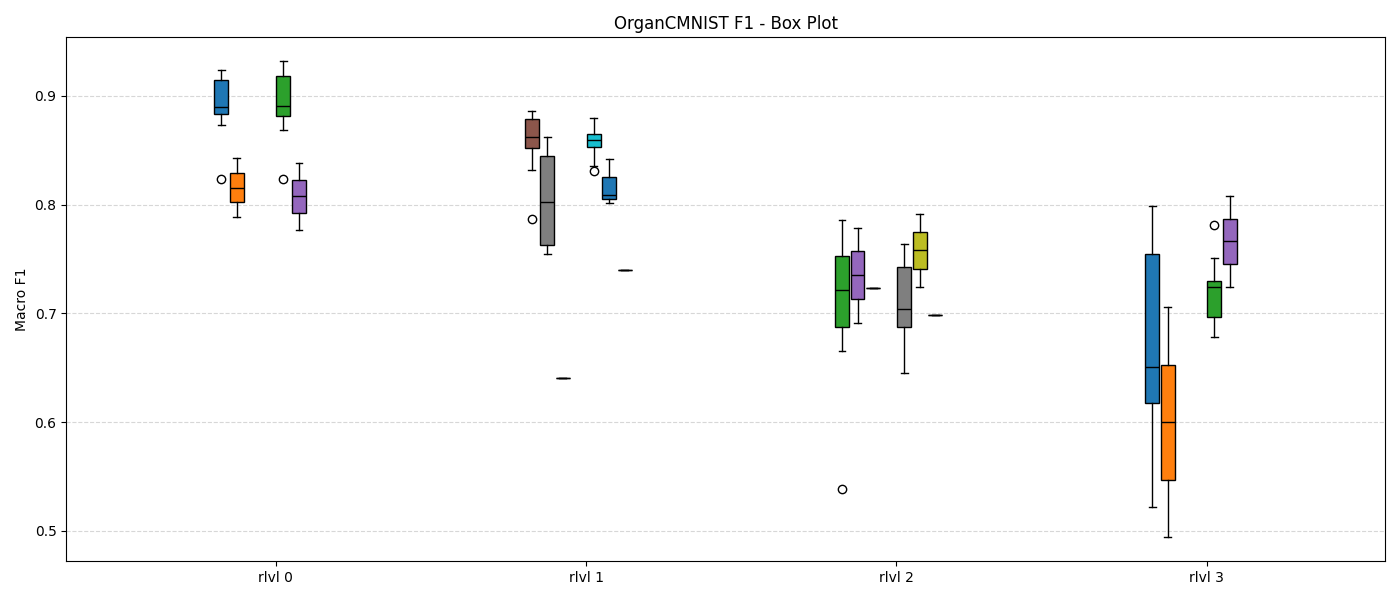

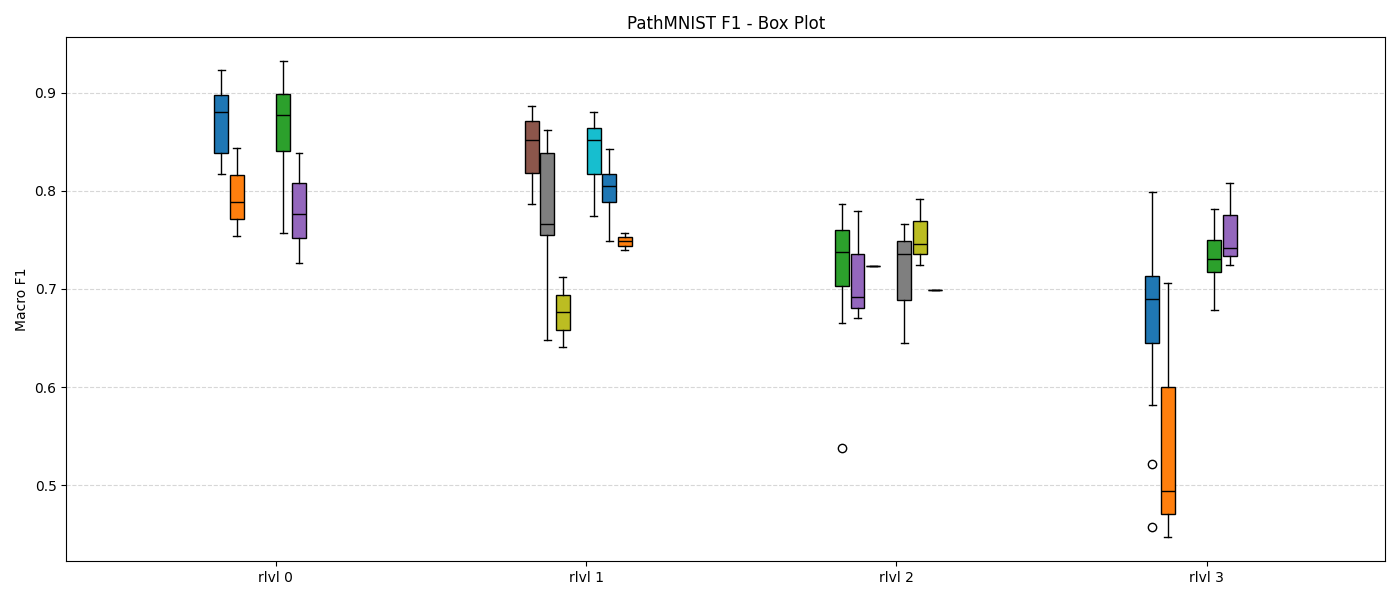

In [53]:
config_labels = {
    (0, 0): "blvl(0), alvl(0)",
    (0, 1): "blvl(0), alvl(1)",
    (0, 2): "blvl(0), alvl(2)",
    (0, 3): "blvl(0), alvl(3)",
    (1, 0): "blvl(1), alvl(0)",
    (1, 1): "blvl(1), alvl(1)",
    (1, 2): "blvl(1), alvl(2)",
    (1, 3): "blvl(1), alvl(3)",
}

# Step 1: Organize raw data by (rlvl, config)
all_data_by_group = {rlvl: {cfg: [] for cfg in config_labels} for rlvl in range(4)}

for name, d in data.items():
    for v, rlvl, blvl, alvl in d:
        key = (blvl, alvl)
        all_data_by_group[rlvl][key].extend(v.tolist())  # Collect raw values

    fig, ax = plt.subplots(figsize=(14, 6))

    # Step 2: Prepare boxplot data
    positions = []
    box_data = []
    labels = []
    width = 0.05

    for rlvl in range(4):
        for i, config in enumerate(config_labels):
            values = all_data_by_group[rlvl][config]
            if values:
                pos = rlvl + (i - 3.5) * width  # Spread the boxes within each rlvl
                positions.append(pos)
                box_data.append(values)
                labels.append(f'rlvl {rlvl}\n{config_labels[config]}')

    # Step 3: Create boxplot
    bp = ax.boxplot(
        box_data,
        positions=positions,
        patch_artist=True,
        widths=width * 0.9,
        showfliers=True,
        medianprops=dict(color='black')
    )

    # Coloring boxes (optional)
    colors = plt.cm.tab10(np.linspace(0, 1, len(config_labels)))
    for patch, color in zip(bp['boxes'], colors.tolist() * 4):
        patch.set_facecolor(color)

    # Step 4: Aesthetics
    ax.set_xticks([i for i in range(4)])
    ax.set_xticklabels([f"rlvl {i}" for i in range(4)])
    ax.set_ylabel('Macro F1')
    ax.set_title(f'{name} F1 - Box Plot')
    ax.grid(axis='y', linestyle='--', alpha=0.5)

    plt.tight_layout()
    plt.savefig(f"{name}_box.png")